#### Libraries and dependencies

In [3]:
from allensdk.brain_observatory.behavior.behavior_project_cache.\
    behavior_neuropixels_project_cache \
    import VisualBehaviorNeuropixelsProjectCache
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
from scipy.signal import butter
from copy import deepcopy
from scipy.signal import filtfilt
output_dir = "E:/jerry/vbn_s3_cache"
cache = VisualBehaviorNeuropixelsProjectCache.from_s3_cache(cache_dir=output_dir)

In [4]:
probes = cache.get_probe_table() # type: ignore
valid_lfp = probes[probes['has_lfp_data']]
print('Fraction of insertions with valid LFP: ', len(valid_lfp)/len(probes))

Fraction of insertions with valid LFP:  0.9602209944751381


In [6]:
display(probes)

,ecephys_session_id,name,sampling_rate,lfp_sampling_rate,phase,has_lfp_data,unit_count,channel_count,structure_acronyms,file_id
ecephys_probe_id,,,,,,,,,,
1044506933,1044385384,probeB,30000.178402,2500.014867,1.0,True,701,384,"['CA1', 'DG', 'LP', 'POL', 'PoT', 'VISpm', 'ro...",0
1044506934,1044385384,probeC,30000.049852,2500.004154,1.0,True,307,384,"['MB', 'MRN', 'POST', 'SCig', 'VISp', 'root']",1
1044506935,1044385384,probeD,30000.029115,2500.002426,1.0,True,521,384,"['CA1', 'CA3', 'DG', 'LGv', 'MB', 'TH', 'VISl'...",2
1044506936,1044385384,probeE,30000.075851,2500.006321,1.0,True,282,384,"['CA1', 'DG', 'MB', 'MGd', 'MGm', 'MRN', 'SGN'...",3
1044506937,1044385384,probeF,29999.959578,2499.996631,1.0,True,368,384,"['CA1', 'DG', 'LP', 'MRN', 'POL', 'PoT', 'SGN'...",4
...,...,...,...,...,...,...,...,...,...,...
1094073089,1093864136,probeE,30000.114385,2500.009532,1.0,False,319,384,"['CA1', 'CA3', 'DG', 'MB', 'MGv', 'PIL', 'PP',...",-999
1095249411,1095138995,probeC,30000.170489,2500.014207,1.0,False,457,384,"['HPF', 'MB', 'MRN', 'NB', 'POST', 'VISp', 'ro...",-999
1095460790,1095340643,probeC,30000.177408,2500.014784,1.0,False,355,384,"['MB', 'MRN', 'NB', 'POST', 'PRE', 'VISp', 'ro...",-999


In [8]:
session_id = probes.loc[1064735073]['ecephys_session_id']
session = cache.get_ecephys_session(ecephys_session_id=session_id) # type: ignore
lfp = session.get_lfp(1064735073)
chans = session.get_channels()
print(len(chans.index))

2298


In [26]:
display(probes[probes['ecephys_session_id'] == session_id])

,ecephys_session_id,name,sampling_rate,lfp_sampling_rate,phase,has_lfp_data,unit_count,channel_count,structure_acronyms,file_id
ecephys_probe_id,,,,,,,,,,
1064735071,1064644573,probeA,29999.995483,2499.999624,1.0,True,348,384,"['APN', 'CA1', 'DG', 'MB', 'VISam', 'root']",200
1064735072,1064644573,probeB,30000.203274,2500.016939,1.0,True,393,384,"['APN', 'DG', 'MB', 'NOT', 'POL', 'ProS', 'SUB...",201
1064735073,1064644573,probeC,30000.068300,2500.005692,1.0,True,349,384,"['HPF', 'MB', 'MRN', 'NB', 'POST', 'VISp', 'ro...",202
1064735075,1064644573,probeD,29999.939657,2499.994971,1.0,True,399,384,"['CA1', 'CA3', 'DG', 'LT', 'MB', 'VISl', 'root']",203
1064735076,1064644573,probeE,30000.097321,2500.008110,1.0,True,412,384,"['CA1', 'DG', 'MB', 'MGd', 'MGm', 'MGv', 'PIL'...",204
1064735077,1064644573,probeF,30000.114311,2500.009526,1.0,True,353,384,"['APN', 'CA1', 'CA3', 'DG', 'Eth', 'LGd', 'LP'...",205


In [28]:
pbs = probes[probes['ecephys_session_id'] == session_id]
for i in pbs.index:
    print(pbs.loc[i]['structure_acronyms'])

['APN', 'CA1', 'DG', 'MB', 'VISam', 'root']
['APN', 'DG', 'MB', 'NOT', 'POL', 'ProS', 'SUB', 'VISpm', 'root']
['HPF', 'MB', 'MRN', 'NB', 'POST', 'VISp', 'root']
['CA1', 'CA3', 'DG', 'LT', 'MB', 'VISl', 'root']
['CA1', 'DG', 'MB', 'MGd', 'MGm', 'MGv', 'PIL', 'TH', 'VISal', 'root']
['APN', 'CA1', 'CA3', 'DG', 'Eth', 'LGd', 'LP', 'MB', 'TH', 'VISrl', 'root']


In [24]:
display(probes.loc[1064735073])

ecephys_session_id                                           1064644573
name                                                             probeC
sampling_rate                                                30000.0683
lfp_sampling_rate                                           2500.005692
phase                                                               1.0
has_lfp_data                                                       True
unit_count                                                          349
channel_count                                                       384
structure_acronyms    ['HPF', 'MB', 'MRN', 'NB', 'POST', 'VISp', 'ro...
file_id                                                             202
Name: 1064735073, dtype: object

In [9]:
print(len(probes.index))

905


In [19]:
single_probe = chans[chans['probe_id']==1064735073]

In [20]:
print(single_probe['structure_acronym'].unique())

['MB' 'MRN' 'NB' 'POST' 'HPF' 'VISp' 'root']


In [15]:
visp_chans = chans[chans['structure_acronym'] == 'VISp']

In [17]:
display(visp_chans['probe_id'].unique())

array([1064735073], dtype=int64)

In [21]:
print(len(lfp.channel.values))

96


#### Tutorial

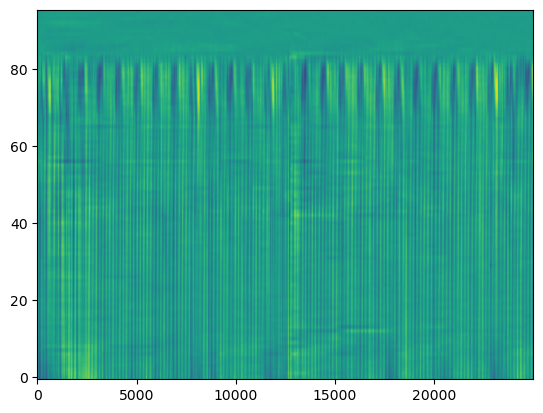

In [5]:
lfp_slice = lfp.sel(time=slice(100,120))
plt.imshow(lfp_slice.T, aspect='auto',origin='lower', cmap='viridis')

In [19]:
stim_presentations = session.stimulus_presentations
flashes = stim_presentations[stim_presentations['stimulus_name'].str.contains('flash')]
presentation_times = flashes.start_time.values
presentation_ids = flashes.index.values

In [20]:
def align_lfp(lfp, trial_window, alignment_times, trial_ids = None):
    '''
    Aligns the LFP data array to experiment times of interest
    INPUTS:
        lfp: data array containing LFP data for one probe insertion
        trial_window: vector specifying the time points to excise around each alignment time
        alignment_times: experiment times around which to excise data
        trial_ids: indices in the session stim table specifying which stimuli to use for alignment.
                    None if aligning to non-stimulus times
    
    OUTPUT:
        aligned data array with dimensions channels x trials x time
    '''
    
    time_selection = np.concatenate([trial_window + t for t in alignment_times])
    
    if trial_ids is None:
        trial_ids = np.arange(len(alignment_times))
        
    inds = pd.MultiIndex.from_product((trial_ids, trial_window), 
                                      names=('presentation_id', 'time_from_presentation_onset'))

    ds = lfp.sel(time = time_selection, method='nearest').to_dataset(name = 'aligned_lfp')
    ds = ds.assign(time=inds).unstack('time')

    return ds['aligned_lfp']

In [26]:
aligned_lfp = align_lfp(lfp, np.arange(-0.5, 0.5, 1/500), presentation_times, presentation_ids)

Text(-0.4, 3570, 'brain surface')

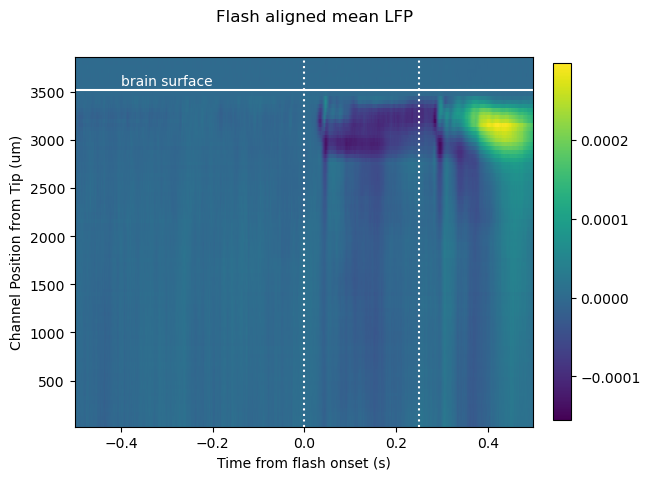

In [27]:
chans = session.get_channels()
lfp_chan_depths = [chans.loc[c]['probe_vertical_position'] for c in lfp.channel.values]

chans_in_brain = chans[(chans['probe_id']==1064735073)&(~chans['structure_acronym'].str.contains('root'))]
first_channel_in_brain_position = chans_in_brain['probe_vertical_position'].max()
fig, ax = plt.subplots()
fig.suptitle('Flash aligned mean LFP')
im = ax.pcolor(aligned_lfp.time_from_presentation_onset.values, lfp_chan_depths, aligned_lfp.mean(dim='presentation_id').data)
_ = plt.colorbar(im, fraction=0.036, pad=0.04)
_ = plt.xlabel('Time from flash onset (s)')
_ = plt.ylabel('Channel Position from Tip (um)')

ax.axvline(0, c='w', ls='dotted')
ax.axvline(0.25, c='w', ls='dotted')
ax.axhline(first_channel_in_brain_position, c='w')
ax.text(-0.4, first_channel_in_brain_position+50, 'brain surface', c='w')

#### Filtering

In [72]:
lfp_slice = lfp.sel(time=slice(20,320))
lfp_copy = deepcopy(lfp_slice)

375000


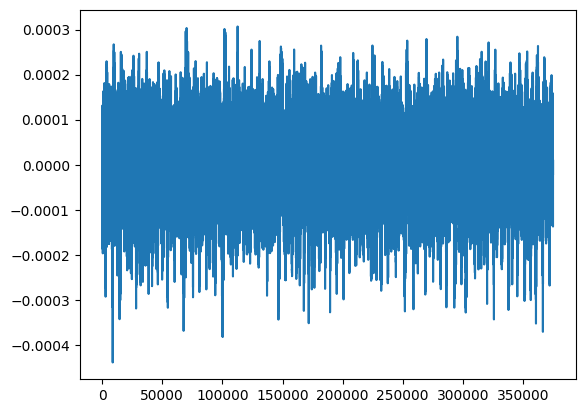

In [102]:
single = lfp_copy.T[0]
plt.plot(single)
print(len(single))

##### 3-8hz

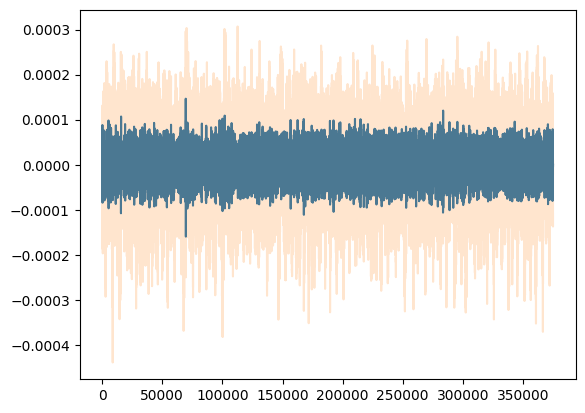

In [103]:
b,a = butter(N=3, Wn=[3, 8], fs=1250, btype='bandpass', output='ba')
y = filtfilt(b, a, single)
plt.plot(y)
plt.plot(single, alpha=0.2)

##### 10-30 Hz

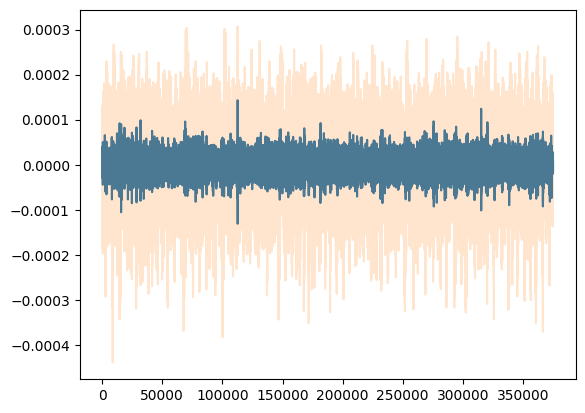

In [104]:
b,a = butter(N=3, Wn=[10, 30], fs=1250, btype='bandpass', output='ba')
y = filtfilt(b, a, single)
plt.plot(y)
plt.plot(single, alpha=0.2)

##### 30-50 Hz

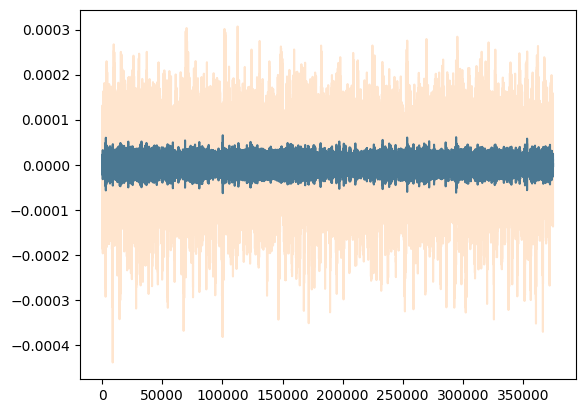

In [109]:
b,a = butter(N=3, Wn=[30, 50], fs=1250, btype='bandpass', output='ba')
y = filtfilt(b, a, single)
plt.plot(y)
plt.plot(single, alpha=0.2)

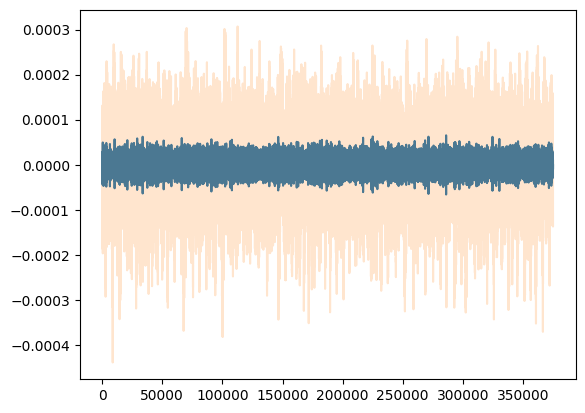

In [123]:
b,a = butter(N=3, Wn=[50, 80], fs=1250, btype='bandpass', output='ba')
y = filtfilt(b, a, single)
plt.plot(y)
plt.plot(single, alpha=0.2)

#### Gaussian HMM for LFP here

In [29]:
from hmmlearn import hmm

In [ ]:
# pick a channel and obtain the LFP

# filter the LFP based on [3,8], [10,30], [30,50], [50,80] Hz

# apply HMM to the filtered LFP

# try different number of hidden states

# try behavioral data and see if certain states can be associated or not



In [124]:
y = np.reshape(y,(-1,1))
y_zscore = (y - np.mean(y))/np.std(y)

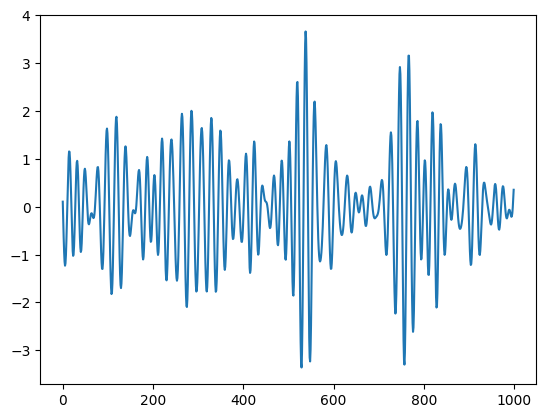

In [130]:
plt.plot(y_zscore[0:1000])

In [125]:
model = hmm.GaussianHMM(n_components=3, n_iter=100,verbose=True, tol=0.1)
model.fit(y_zscore)

         1 -581928.16947642             +nan
         2 -446141.92271486 +135786.24676156
         3 -435460.44554342  +10681.47717143
         4 -431698.92768498   +3761.51785844
         5 -427110.43913038   +4588.48855460
         6 -421695.73238773   +5414.70674265
         7 -415892.02868653   +5803.70370120
         8 -408331.27216875   +7560.75651778
         9 -395581.17068512  +12750.10148363
        10 -385168.06036298  +10413.11032215
        11 -380292.71451779   +4875.34584518
        12 -377188.36008816   +3104.35442964
        13 -374729.38487137   +2458.97521679
        14 -372316.79006525   +2412.59480611
        15 -369580.96166779   +2735.82839747
        16 -366546.15749680   +3034.80417099
        17 -363796.82865902   +2749.32883778
        18 -361969.06314812   +1827.76551090
        19 -361058.37038984    +910.69275828
        20 -360671.98680513    +386.38358471
        21 -360510.62507087    +161.36173426
        22 -360436.97487510     +73.65019577
        23

GaussianHMM(n_components=3, n_iter=100, verbose=True)

In [126]:
preds= model.predict(y)

In [127]:
print(np.unique(preds))

[0]


In [114]:
print(preds)

[0 0 0 ... 0 0 0]
